### Fourier Series of a Square Wave

The code below computes the Fourier Series representation of a square wave function. Here's a step-by-step explanation of the mathematical concepts and code:

---

### **Square Wave Function**

A square wave is a periodic function that alternates between high and low values, forming a "square" shape. Mathematically, it is often represented as a periodic function that takes values of 1 and -1 at regular intervals. The function used here is:

- **Square Wave**: A function that alternates between 1 and -1 over each period.

The code uses `scipy.signal.square` to generate the square wave.

---

### **Fourier Series Representation**

The Fourier series is a mathematical tool that decomposes a periodic function into a sum of sines and cosines. The Fourier series of a square wave can be written as:

- **Fourier Series**:
  - **a₀** is the average value of the function over one period.
  - **aₙ** and **bₙ** are the Fourier coefficients for the cosine and sine terms, respectively, that define the function.

The formula for a Fourier series is:

- **a₀**: The average or DC component is computed as the integral (or sum) of the function over one period, divided by the period length.
- **aₙ** (Cosine coefficients): These are the Fourier coefficients for the cosine terms in the series.
- **bₙ** (Sine coefficients): These are the Fourier coefficients for the sine terms in the series.

---

### **Code Walkthrough**

1. **Square Wave Generation**:
   The function `square1(x)` is a wrapper around the `scipy.signal.square` function, which generates a square wave for given input `x`. The values of `x` range from `-π` to `π`.

   ```python
   x = np.linspace(-np.pi, np.pi, 1000)
   y = square(x)
   ```

   Here, `y` is the array representing the square wave for values of `x` in the range `-π` to `π`.

2. **Computing the Fourier Coefficients**:
   We compute the Fourier coefficients using numerical integration with the `np.trapz` function, which approximates the integral.

   - **a₀**: This is the average value (DC component) of the square wave over one period. It's calculated as the average of the function over the range of `x`.

   ```python
   a0 = (1 / (2 * np.pi)) * np.trapz(y, x)
   ```

   - **aₙ** and **bₙ**: These are the coefficients for the cosine and sine components, respectively. We loop over a range of `n` terms and calculate these coefficients for each one.

   ```python
   an = (1 / np.pi) * np.trapz(y * np.cos(n * x), x)
   bn = (1 / np.pi) * np.trapz(y * np.sin(n * x), x)
   ```

3. **Building the Fourier Series**:
   Once the Fourier coefficients are computed, we sum them to reconstruct the Fourier series for the square wave. The series is given by:

   ```python
   fs = a0 + sum([An[i] * np.cos((i+1) * x) + Bn[i] * np.sin((i+1) * x) for i in range(n)])
   ```

   This reconstructs the square wave approximation using the Fourier series.

4. **Plotting the Results**:
   We then plot both the original square wave (`y`) and the Fourier series (`fs`) on the same graph. This helps visualize how well the Fourier series approximates the square wave.

   ```python
   plt.plot(x, fs, label='Fourier Series')
   plt.fill_between(x, fs, color = 'c', alpha = 0.2)
   plt.plot(x, y, '--', label='Square Wave')
   ```

   The graph shows the Fourier series approximation (`fs`) and the original square wave (`y`) for comparison.

---

### **Output**

- **a₀** is printed, which is the average value of the square wave over one period.
- The first five values of **aₙ** and **bₙ** are printed, which represent the first few terms of the Fourier expansion.
- The plot shows the original square wave and its Fourier series approximation, demonstrating how the series approximates the square wave as more terms are added.

### **Results**

When you run this code:

1. The first few Fourier coefficients (aₙ and bₙ) will be printed, which contribute to the approximation.
2. A plot will display the square wave function and the Fourier series representation, showing how the Fourier series becomes more accurate as the number of terms increases.

This demonstrates the power of Fourier series in approximating periodic functions like the square wave, which has sharp transitions.

a0 = -0.0010010010010009954
an = [0.0020020020020022735, -0.0020020020020019556, 0.0020020020020022206, -0.002002002002001993, 0.0020020020020023]
bn = [1.2732384954398976, 6.295791306382001e-06, 0.4244100336884417, 1.2591707137575844e-05, 0.25464266244995354]


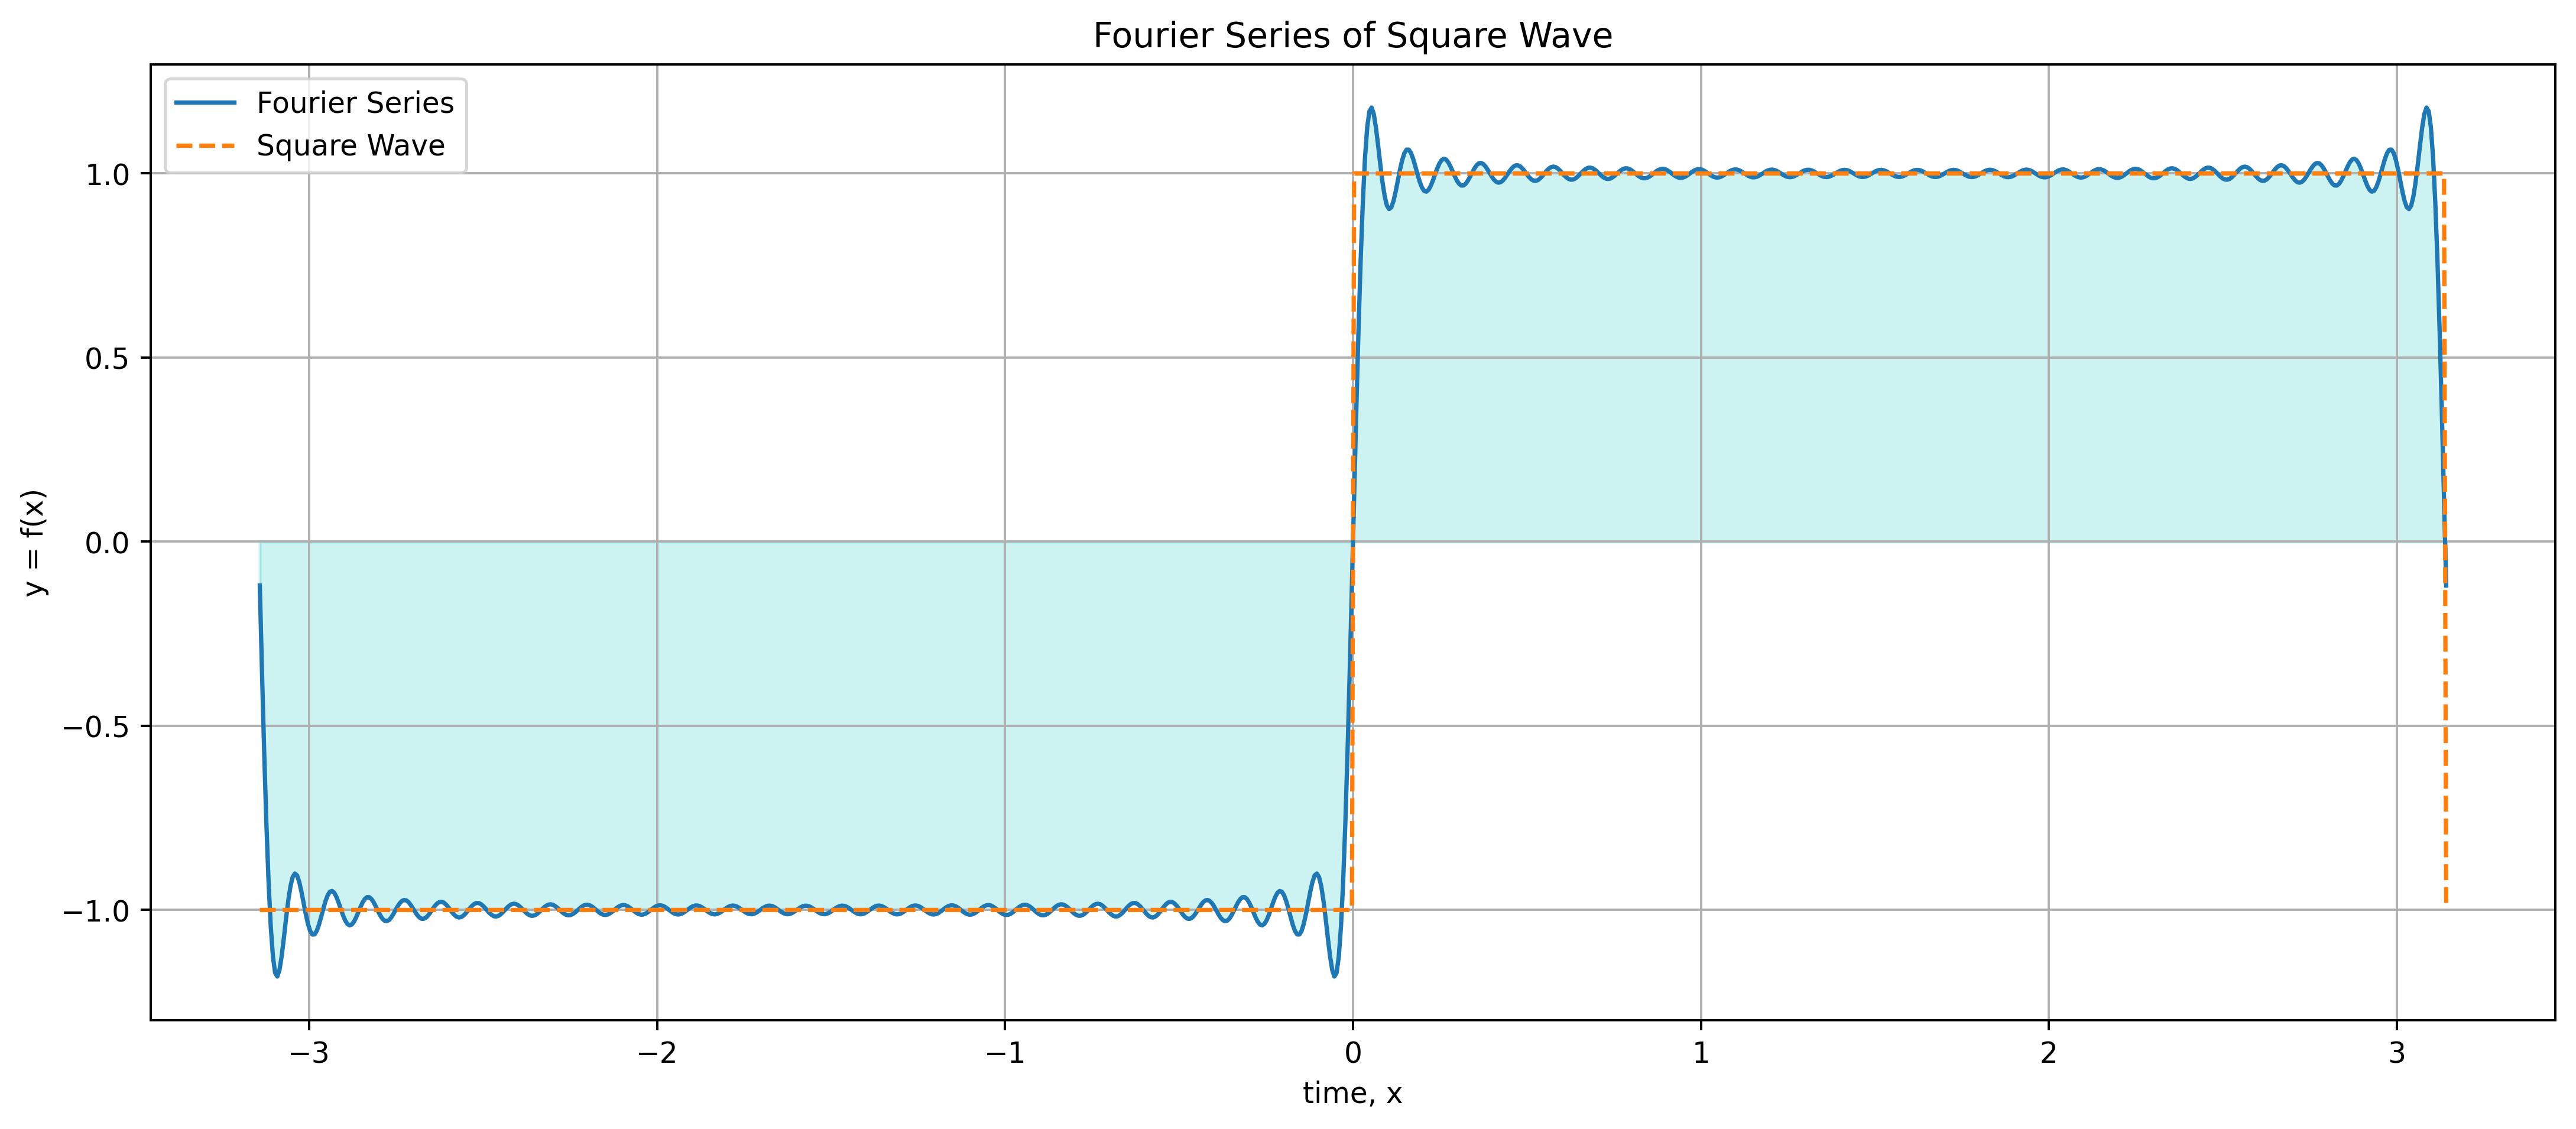

In [3]:
import numpy as np
from scipy.signal import square
import matplotlib.pyplot as plt

def square1(x):
    return square(x)

x = np.linspace(-np.pi, np.pi, 1000)
y = square(x)
a0 = (1 / (2 * np.pi)) * np.trapz(y, x)
n = 60
An = []
Bn = []

for n in range(1, n):
    an = (1 / np.pi) * np.trapz(y * np.cos(n * x), x)
    bn = (1 / np.pi) * np.trapz(y * np.sin(n * x), x)
    An.append(an)
    Bn.append(bn)

print("a0 =", a0)
print("an =", An[0:5])
print("bn =", Bn[0:5])

fs = a0 + sum([An[i] * np.cos((i+1) * x) + Bn[i] * np.sin((i+1) * x) for i in range(n)])

plt.figure(figsize=(15,6), dpi=350)
plt.plot(x, fs, label='Fourier Series')
plt.fill_between(x, fs, color = 'c', alpha = 0.2)
plt.plot(x, y, '--', label='Square Wave')
plt.legend()
plt.title('Fourier Series of Square Wave')
plt.xlabel('time, x')
plt.ylabel('y = f(x)')
plt.grid(True)
plt.show()